In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("one_way_manova.csv")
df.head()

,id,Sepal.Length,Petal.Length,Species
0,1,5.1,1.4,setosa
1,2,4.9,1.4,setosa
2,3,4.7,1.3,setosa
3,4,4.6,1.5,setosa
4,5,5.0,1.4,setosa


## Summary Statistics

In [3]:
stats = df.groupby(['Species'])['Sepal.Length', 'Petal.Length'].agg(['count', 'std', 'mean'])
stats

C:\Users\Administrator\AppData\Local\Temp\ipykernel_3228\1053844134.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  stats = df.groupby(['Species'])['Sepal.Length', 'Petal.Length'].agg(['count', 'std', 'mean'])


Sepal.Length                  Petal.Length                 
                  count       std   mean        count       std   mean
Species                                                               
setosa               50  0.352490  5.006           50  0.173664  1.462
versicolor           50  0.516171  5.936           50  0.469911  4.260
virginica            50  0.635880  6.588           50  0.551895  5.552

## Boxplot

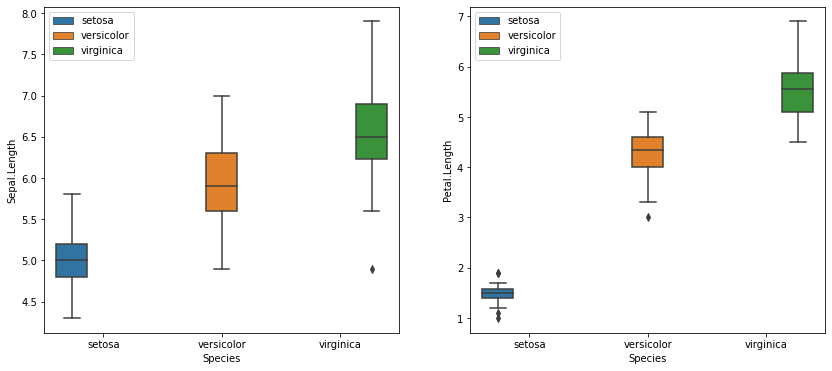

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, axs = plt.subplots(ncols=2, figsize=(14,6))
sns.boxplot(data=df, x="Species", y="Sepal.Length", hue=df.Species.tolist(), ax=axs[0])
sns.boxplot(data=df, x="Species", y="Petal.Length", hue=df.Species.tolist(), ax=axs[1])
plt.show()

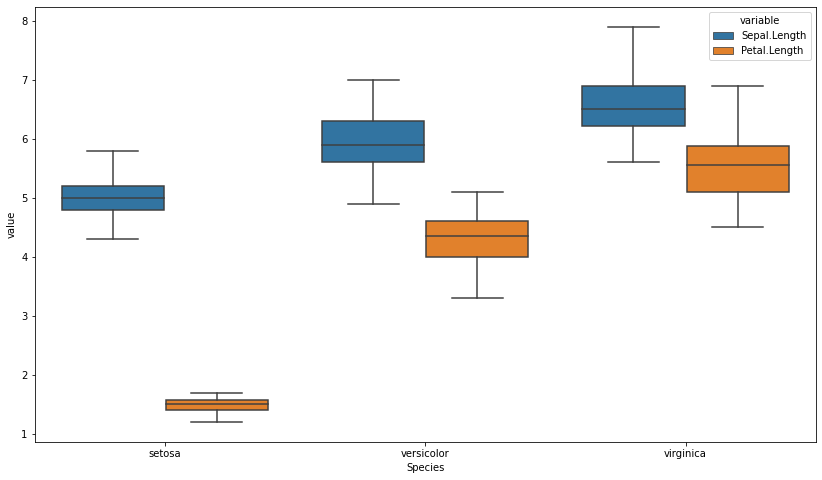

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
fig = plt.subplots(ncols=1, figsize=(14,8))
dfl = pd.melt(df, id_vars='Species', value_vars=['Sepal.Length', 'Petal.Length'])
sns.boxplot(x='Species', y='value', data=dfl, showfliers=False, hue='variable')
plt.show()

## Interaction plot using Seaborn

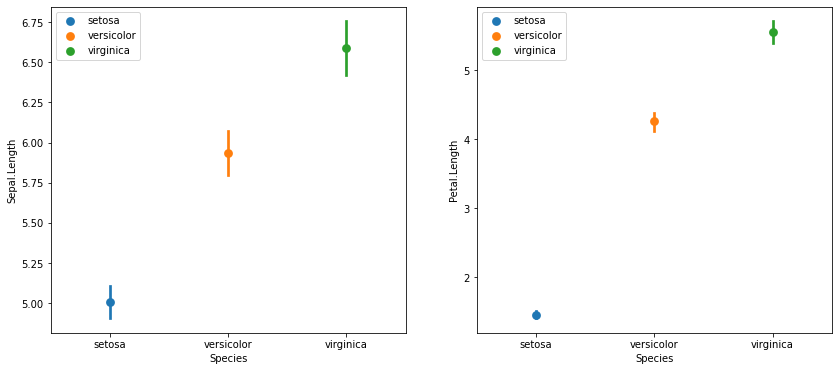

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, axs = plt.subplots(ncols=2, figsize=(14,6))
sns.pointplot(data=df, x="Species", y="Sepal.Length", hue=df.Species.tolist(), ax=axs[0])
sns.pointplot(data=df, x="Species", y="Petal.Length", hue=df.Species.tolist(), ax=axs[1])
plt.show()

# Assumptions

### Outliers

#### Identify univariate outliers

In [7]:
def outliers(dep, ind):
    dicts = {'Outliers':{}}
    for cat_ind in pd.unique(df[ind]):
        Q1, Q3 = np.percentile(df[dep][df[ind] == cat_ind], [25,75])
        IQR = Q3-Q1
        lower_fence, upper_fence= Q1-(1.5*IQR), Q3+(1.5*IQR)
        new_dataset = []
        for i in df[dep][df[ind] == cat_ind]:
            if i < lower_fence or i > upper_fence:
                new_dataset.append(i)
        dicts['Outliers'][f'{cat_ind}'] = new_dataset
    return pd.DataFrame(dicts)

In [8]:
outliers('Sepal.Length', 'Species')

,Outliers
setosa,[]
versicolor,[]
virginica,[4.9]


In [9]:
def outliers(dep, ind):
    dicts = {'Outliers':{}}
    for cat_ind in pd.unique(df[ind]):
        Q1, Q3 = np.percentile(df[dep][df[ind] == cat_ind], [25,75])
        IQR = Q3-Q1
        lower_fence, upper_fence= Q1-(1.5*IQR), Q3+(1.5*IQR)
        new_dataset = []
        for i in df[dep][df[ind] == cat_ind]:
            if i < lower_fence or i > upper_fence:
                new_dataset.append(i)
        dicts['Outliers'][f'{cat_ind}'] = new_dataset
    return pd.DataFrame(dicts)

In [10]:
outliers('Petal.Length', 'Species')

,Outliers
setosa,"[1.1, 1.0, 1.9, 1.9]"
versicolor,[3.0]
virginica,[]


#### Identify multivariate outliers

In [11]:
setosa = df[df['Species'] == 'setosa'][['Sepal.Length', 'Petal.Length']]
versicolor = df[df['Species'] == 'versicolor'][['Sepal.Length', 'Petal.Length']]
virginica = df[df['Species'] == 'virginica'][['Sepal.Length', 'Petal.Length']]

In [12]:
def Mahalanobis_distance(categories):   
    import numpy as np
    import pandas as pd
    import scipy as stats
    from scipy.stats import chi2

    # calculateMahalanobis Function to calculate
    # the Mahalanobis distance
    def calculateMahalanobis(y=None, data=None, cov=None):
        y_mu = y - np.mean(data)
        if not cov:
            cov = np.cov(data.values.T)
        inv_covmat = np.linalg.inv(cov)
        left = np.dot(y_mu, inv_covmat)
        mahal = np.dot(left, y_mu.T)
        return mahal.diagonal()
    
    results = pd.DataFrame()
    
    i = ['setosa', 'versicolor', 'virginica']
    for i, cat in zip(i, categories):
        # Creating a new column in the dataframe that holds
        # the Mahalanobis distance for each row
        results[f'{i}_Mahalanobis'] = calculateMahalanobis(y=cat, data=cat)

        # calculate p-value for each mahalanobis distance
        results[f'{i}_p'] = 1 - chi2.cdf(results[f'{i}_Mahalanobis'], 3)
    return results

In [13]:
Mahalanobis_distance([setosa, versicolor, virginica])

C:\ProgramData\Anaconda3\envs\All\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\ProgramData\Anaconda3\envs\All\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\ProgramData\Anaconda3\envs\All\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


,setosa_Mahalanobis,setosa_p,versicolor_Mahalanobis,versicolor_p,virginica_Mahalanobis,virginica_p
0,0.268621,0.965818,5.134374,0.162218,5.924332,0.115350
1,0.172860,0.981847,0.872792,0.831988,1.786526,0.617871
2,1.282637,0.733260,3.492890,0.321685,0.665170,0.881364
3,1.625224,0.653684,0.729700,0.866197,1.109309,0.774827
4,0.134070,0.987457,1.217263,0.748867,1.298084,0.729588
5,2.486509,0.477734,1.905510,0.592248,3.615587,0.306077
6,1.329274,0.722194,0.876748,0.831035,7.641622,0.054029
7,0.054015,0.996715,4.678285,0.196928,1.847442,0.604666
8,2.966920,0.396754,1.795616,0.615889,0.379849,0.944373
9,0.186806,0.979691,2.254587,0.521277,1.028931,0.794252


In [14]:
# There were no multivariate outliers in the data, as assessed by Mahalanobis distance (p > 0.001)

### Normality

#### Check univariate normality assumption

In [15]:
setosa = df[df['Species'] == 'setosa'][['Sepal.Length', 'Petal.Length']]
versicolor = df[df['Species'] == 'versicolor'][['Sepal.Length', 'Petal.Length']]
virginica = df[df['Species'] == 'virginica'][['Sepal.Length', 'Petal.Length']]

In [16]:
def shapiro(categories):
    normality = {'Shapiro':{}}
    import scipy.stats as stats
    i = ['setosa', 'versicolor', 'virginica'] 
    for i, cat in zip(i, categories):
        columns = cat.columns
        for j in columns:
            result = stats.shapiro(cat[j])
            normality['Shapiro'][f'{i} and {j}'] = result
    return pd.DataFrame(normality)

In [17]:
shapiro([setosa, versicolor, virginica])

,Shapiro
setosa and Petal.Length,"(0.9549766182899475, 0.05481043830513954)"
setosa and Sepal.Length,"(0.9776989221572876, 0.4595281183719635)"
versicolor and Petal.Length,"(0.9660047888755798, 0.1584833413362503)"
versicolor and Sepal.Length,"(0.9778355956077576, 0.46473264694213867)"
virginica and Petal.Length,"(0.9621862769126892, 0.10977369546890259)"
virginica and Sepal.Length,"(0.9711798429489136, 0.25832483172416687)"


#### Multivariate normality

In [18]:
X = df[['Sepal.Length', 'Petal.Length']]

In [19]:
from pingouin import multivariate_normality
#perform the Henze-Zirkler Multivariate Normality Test
multivariate_normality(X, alpha=.05)

HZResults(hz=5.450383639328617, pval=1.035769444922176e-11, normal=False)

### Identify multicollinearity

In [20]:
import pingouin as pg

In [21]:
pg.corr(df['Sepal.Length'], df['Petal.Length']).round(3)

,n,r,CI95%,p-val,BF10,power
pearson,150,0.872,"[0.83, 0.91]",0.0,1.811e+44,1.0


### Check linearity assumption

#### setosa

In [22]:
import pingouin as pg
pg.corr(df['Sepal.Length'][df['Species']=='setosa'], df['Petal.Length'][df['Species']=='setosa']).round(3)

,n,r,CI95%,p-val,BF10,power
pearson,50,0.267,"[-0.01, 0.51]",0.061,0.975,0.473


<AxesSubplot:xlabel='Sepal.Length', ylabel='Petal.Length'>

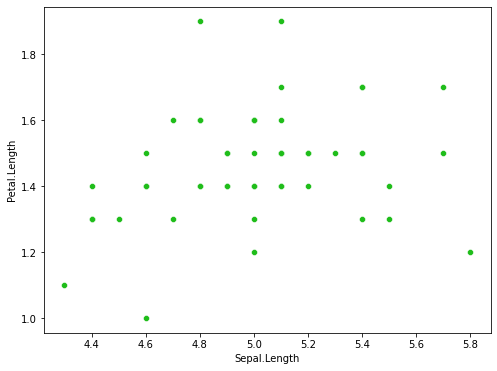

In [23]:
plt.figure(figsize=(8,6))
Palette = ["#1FBD1A"]
sns.set_palette(Palette)
sns.scatterplot(data=df[df['Species'] == 'setosa'], x="Sepal.Length", y="Petal.Length")

#### versicolor

In [24]:
import pingouin as pg
pg.corr(df['Sepal.Length'][df['Species']=='versicolor'], df['Petal.Length'][df['Species']=='versicolor']).round(3)

,n,r,CI95%,p-val,BF10,power
pearson,50,0.754,"[0.6, 0.85]",0.0,4.637e+07,1.0


<AxesSubplot:xlabel='Sepal.Length', ylabel='Petal.Length'>

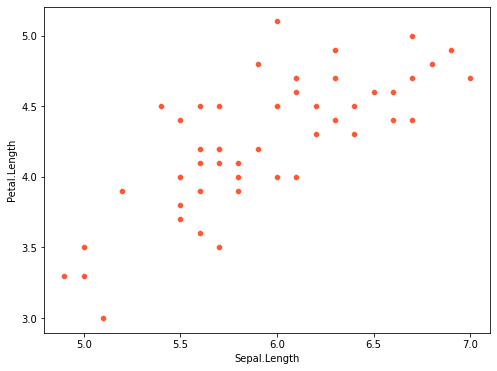

In [25]:
plt.figure(figsize=(8,6))
Palette = ["#FF5733"]
sns.set_palette(Palette)
sns.scatterplot(data=df[df['Species'] == 'versicolor'], x="Sepal.Length", y="Petal.Length")

#### virginica

In [26]:
import pingouin as pg
pg.corr(df['Sepal.Length'][df['Species']=='virginica'], df['Petal.Length'][df['Species']=='virginica']).round(3)

,n,r,CI95%,p-val,BF10,power
pearson,50,0.864,"[0.77, 0.92]",0.0,9.996e+12,1.0


<AxesSubplot:xlabel='Sepal.Length', ylabel='Petal.Length'>

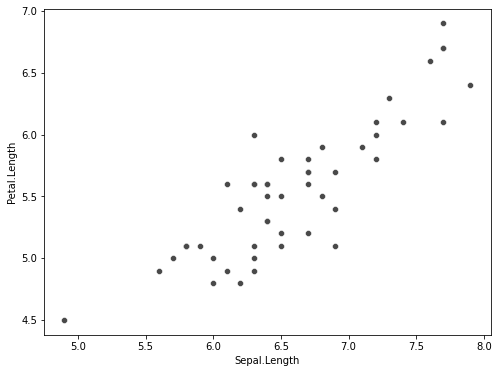

In [27]:
plt.figure(figsize=(8,6))
Palette = ["#494949"]
sns.set_palette(Palette)
sns.scatterplot(data=df[df['Species'] == 'virginica'], x="Sepal.Length", y="Petal.Length")

### Check the homogeneity of covariances assumption

In [28]:
import pingouin as pg
pg.box_m(df, dvs=['Sepal.Length', 'Petal.Length'], group='Species')

,Chi2,df,pval,equal_cov
box,58.375558,6.0,9.616505e-11,False


### Check the homogneity of variance assumption

In [29]:
# if normality exists then perform bartlett otherwise levene's tests

In [30]:
# Null Hypothesis: the variances are equal across all samples/groups
# Alternative Hypothesis:  the variances are not equal across all samples/groups

In [31]:
from scipy.stats import bartlett
from scipy.stats import levene

Sepal_Length_Levene = levene(df['Sepal.Length'][df['Species']=='setosa'],df['Sepal.Length'][df['Species']=='versicolor'],df['Sepal.Length'][df['Species']=='virginica'])
Petal_Length_Levene = levene(df['Petal.Length'][df['Species']=='setosa'],df['Petal.Length'][df['Species']=='versicolor'],df['Petal.Length'][df['Species']=='virginica'])
Sepal_Length_bartlett = bartlett(df['Sepal.Length'][df['Species']=='setosa'],df['Sepal.Length'][df['Species']=='versicolor'],df['Sepal.Length'][df['Species']=='virginica'])
Petal_Length_bartlett = bartlett(df['Petal.Length'][df['Species']=='setosa'],df['Petal.Length'][df['Species']=='versicolor'],df['Petal.Length'][df['Species']=='virginica'])

homo = {
    'Bartlett':{
        'Sepal.Length':Sepal_Length_bartlett,
        'Petal.Length':Petal_Length_bartlett
    }, 
    'Levene':{
        'Sepal.Length':Sepal_Length_Levene,
        'Petal.Length':Petal_Length_Levene
    }
}
pd.DataFrame(homo)

,Bartlett,Levene
Sepal.Length,"(16.005701874401502, 0.0003345076070163035)","(6.35272002048269, 0.0022585277836218586)"
Petal.Length,"(55.42250284023702, 9.229037733034152e-13)","(19.480338801923573, 3.1287566394085344e-08)"


## One-Way MANOVA Computation

In [32]:
df['Sepal_Length'] = df['Sepal.Length']
df['Petal_Length'] = df['Petal.Length']

In [33]:
from statsmodels.multivariate.manova import MANOVA
fit = MANOVA.from_formula('Sepal_Length + Petal_Length  ~ Species', data=df)
fit.mv_test().summary()

C:\ProgramData\Anaconda3\envs\All\lib\site-packages\statsmodels\compat\pandas.py:61: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex


<class 'statsmodels.iolib.summary2.Summary'>
"""
                   Multivariate linear model
================================================================
                                                                
----------------------------------------------------------------
       Intercept         Value  Num DF  Den DF   F Value  Pr > F
----------------------------------------------------------------
          Wilks' lambda  0.0219 2.0000 146.0000 3255.3901 0.0000
         Pillai's trace  0.9781 2.0000 146.0000 3255.3901 0.0000
 Hotelling-Lawley trace 44.5944 2.0000 146.0000 3255.3901 0.0000
    Roy's greatest root 44.5944 2.0000 146.0000 3255.3901 0.0000
----------------------------------------------------------------
                                                                
----------------------------------------------------------------
        Species          Value  Num DF  Den DF   F Value  Pr > F
----------------------------------------------------------------
          Wilks' lambda  0.0399 4.0000 292.0000  292.5565 0.0000
         Pillai's trace  0.9885 4.0000 294.0000   71.8288 0.0000
 Hotelling-Lawley trace 23.3647 4.0000 174.1653  850.8986 0.0000
    Roy's greatest root 23.3342 2.0000 147.0000 1715.0602 0.0000
================================================================

"""

## Post-hoct tests

### Compute univariate one-way ANOVA

#### Compute simple main effects

#### anova

In [34]:
import pingouin as pg
series = ['Sepal.Length', 'Petal.Length']
tables = []
for i in series:
    anova_table = pg.anova(dv=i, between='Species', data=df, detailed=True)
    tables.append(anova_table)
df_anova = pd.concat(tables, keys=series, axis=0)
df_anova

Source          SS   DF          MS            F  \
Sepal.Length 0  Species   63.212133    2   31.606067   119.264502   
             1   Within   38.956200  147    0.265008          NaN   
Petal.Length 0  Species  437.102800    2  218.551400  1180.161182   
             1   Within   27.222600  147    0.185188          NaN   

                       p-unc       np2  
Sepal.Length 0  1.669669e-31  0.618706  
             1           NaN       NaN  
Petal.Length 0  2.856777e-91  0.941372  
             1           NaN       NaN

#### welch_anova

In [35]:
from pingouin import welch_anova 
series = ['Sepal.Length', 'Petal.Length']
tables = []
for i in series:
    welch_table = welch_anova(dv=i, between='Species', data=df)
    tables.append(welch_table)
df_welch = pd.concat(tables, keys=series, axis=0)
df_welch

,,Source,ddof1,ddof2,F,p-unc,np2
Sepal.Length,0,Species,2,92.211145,138.908285,1.505059e-28,0.618706
Petal.Length,0,Species,2,78.072955,1828.091945,2.693327e-66,0.941372


#### kruskal

In [36]:
from pingouin import kruskal 
series = ['Sepal.Length', 'Petal.Length']
tables = []
for i in series:
    kruskal_table = kruskal(dv=i, between='Species', data=df)
    tables.append(kruskal_table)
df_kruskal = pd.concat(tables, keys=series, axis=0)
df_kruskal

,,Source,ddof1,H,p-unc
Sepal.Length,Kruskal,Species,2,96.937436,8.918734e-22
Petal.Length,Kruskal,Species,2,130.411049,4.803974e-29


### Compute multiple pairwise comparisons

If you had violated the assumption of homogeneity of variances, as in our example, you might prefer to run a Games-Howell post-hoc test insted of tukey_hsd

In [37]:
series = ['Sepal.Length', 'Petal.Length']
tables = []
for i in series:
    gameshowell = pg.pairwise_gameshowell(data=df, dv=f'{i}', between='Species').round(3)
    tables.append(gameshowell)
df_kruskal = pd.concat(tables, keys=series, axis=0)
df_kruskal

A           B  mean(A)  mean(B)   diff     se  \
Sepal.Length 0      setosa  versicolor    5.006    5.936 -0.930  0.088   
             1      setosa   virginica    5.006    6.588 -1.582  0.103   
             2  versicolor   virginica    5.936    6.588 -0.652  0.116   
Petal.Length 0      setosa  versicolor    1.462    4.260 -2.798  0.071   
             1      setosa   virginica    1.462    5.552 -4.090  0.082   
             2  versicolor   virginica    4.260    5.552 -1.292  0.103   

                     T      df  pval  hedges  
Sepal.Length 0 -10.521  86.538   0.0  -2.088  
             1 -15.386  76.516   0.0  -3.054  
             2  -5.629  94.025   0.0  -1.117  
Petal.Length 0 -39.493  62.140   0.0  -7.838  
             1 -49.986  58.609   0.0  -9.921  
             2 -12.604  95.570   0.0  -2.501

## Report

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

setosa_Sepal.Length vs. versicolor_Sepal.Length: Custom statistical test, P_val:1.000e-04
versicolor_Sepal.Length vs. virginica_Sepal.Length: Custom statistical test, P_val:1.000e-04
setosa_Petal.Length vs. versicolor_Petal.Length: Custom statistical test, P_val:1.000e-04
versicolor_Petal.Length vs. virginica_Petal.Length: Custom statistical test, P_val:1.000e-04
setosa_Sepal.Length vs. virginica_Sepal.Length: Custom statistical test, P_val:1.000e-04
setosa_Petal.Length vs. virginica_Petal.Length: Custom statistical test, P_val:1.000e-04


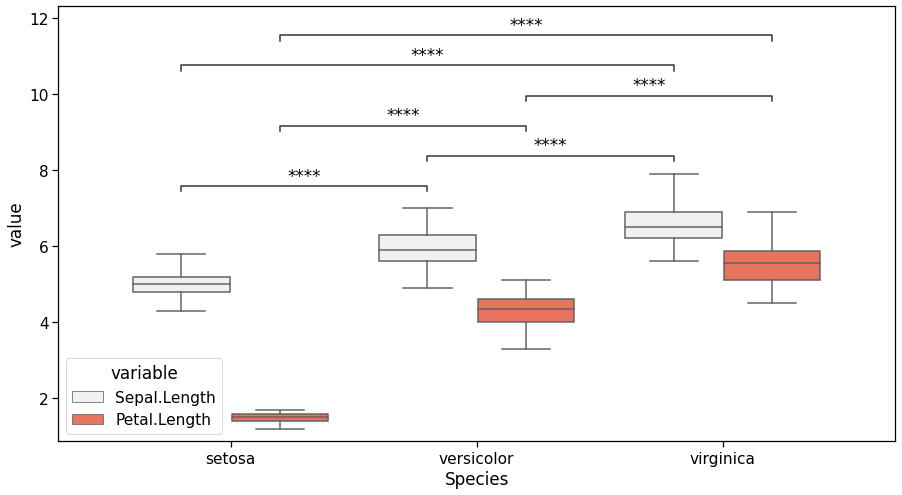

In [38]:
from statannotations.Annotator import Annotator

# palette = sns.color_palette("YlGnBu", n_colors=3)

hue_order = ["Sepal.Length", "Petal.Length"]

pvalues = [0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001]

# Putting the parameters in a dictionary avoids code duplication
# since we use the same for `sns.boxplot` and `Annotator` calls..

pairs = [
    [('setosa', 'Sepal.Length'), ('versicolor', 'Sepal.Length')],
    [('setosa', 'Sepal.Length'), ('virginica', 'Sepal.Length')],
    [('versicolor', 'Sepal.Length'), ('virginica', 'Sepal.Length')],
    
    [('setosa', 'Petal.Length'), ('versicolor', 'Petal.Length')],
    [('setosa', 'Petal.Length'), ('virginica', 'Petal.Length')],
    [('versicolor', 'Petal.Length'), ('virginica', 'Petal.Length')],
]

dfl = pd.melt(df, id_vars='Species', value_vars=['Sepal.Length', 'Petal.Length'])

plotting_parameters = {
    'data': dfl,
    'x': 'Species',
    'y': "value",
    'showfliers':False,
    'color':'tomato',
    "hue": 'variable',
    "hue_order": hue_order,
#     "palette": palette
}

with sns.plotting_context('notebook', font_scale = 1.4):
    
    from matplotlib import pyplot as plt
    plt.figure(figsize=(15,8))
    
    ax = sns.boxplot(**plotting_parameters)

    # Add annotations
    annotator = Annotator(ax, pairs, **plotting_parameters)
    annotator.set_pvalues(pvalues)
    annotator.annotate()

    plt.show()